# AM120 HW04
## Zachary Miller

### 1a

In [19]:
import numpy as np

F = np.array([[-43,-36,21,-30,73,51,-58,22],[-49,35,-51,-50,49,67,65,-66]])
F_prime = F-np.mean(F, 1).reshape(2,-1)
C = np.matmul(F_prime,F_prime.T)/F_prime.shape[1]

In [20]:
print(C)

[[2033.    381.  ]
 [ 381.   3024.75]]


In [31]:
eigvals, eigvecs = np.linalg.eig(C)
print("Eigenvalues of C:")
print(eigvals)
print("Eigenvectors of C:")
print(eigvecs)
U = np.array([eigvecs[1], eigvecs[0]])

Eigenvalues of C:
[1903.53268125 3154.21731875]
Eigenvectors of C:
[[-0.94682778 -0.32174082]
 [ 0.32174082 -0.94682778]]


In [32]:
T = np.matmul(U.T,F)
print(T)

[[ 32.55970573 -44.7216419   55.04477401  37.68916422 -22.90748102
  -47.02867916 -80.20477338  69.56893151]
 [ 56.47889484  22.8248712   -3.47460134  44.49187454 -84.8837282
  -69.8448519   34.00285762   0.40468323]]


In [27]:
eigvals[1]/np.sum(eigvals)

0.6236404169352571

In [28]:
eigvals[0]/np.sum(eigvals)

0.376359583064743

### 1b

### 2a

In [21]:
import scipy as scipy
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Create the data
N = 1000
V1 = np.array([0, 1.1, 0, -1.1, -0.8]).reshape(5,1)
V2 = np.array([0, -1, 0, 0.2, 0]).reshape(5,1)
V3 = np.array([-1.1, 0, 0, 1.1, 0]).reshape(5,1)
t = np.linspace(1, N, 1000)

F = 3*V1*np.cos(t/3)+2*V2*np.cos(t/5)-0.5*V3*np.cos(t/7)

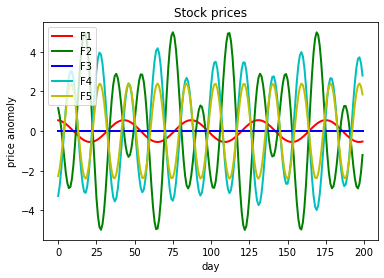

In [27]:
# Plot the data
Np = 200
tp = np.arange(0,Np).reshape(1,Np)

fig1=plt.figure(1); plt.clf();
hl1,=plt.plot(tp.T,F[0,tp].T,'r-',linewidth=2);
hl2,=plt.plot(tp.T,F[1,tp].T,'g-',linewidth=2);
hl3,=plt.plot(tp.T,F[2,tp].T,'b-',linewidth=2);
hl4,=plt.plot(tp.T,F[3,tp].T,'c-',linewidth=2);
hl5,=plt.plot(tp.T,F[4,tp].T,'y-',linewidth=2);
plt.legend([hl1,hl2,hl3,hl4,hl5],['F1','F2','F3','F4','F5']);
plt.xlabel('day'); plt.ylabel('price anomoly'); plt.title('Stock prices');

### 2b

In [32]:
# Calculate the covariance matrix
C = np.matmul(F,F.T)/N
np.set_printoptions(linewidth=132)
print(C)

[[ 1.51189e-01 -2.60187e-03  0.00000e+00 -1.51916e-01 -1.13413e-03]
 [-2.60187e-03  7.40656e+00  0.00000e+00 -5.82330e+00 -3.94963e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [-1.51916e-01 -5.82330e+00  0.00000e+00  5.67423e+00  3.96150e+00]
 [-1.13413e-03 -3.94963e+00  0.00000e+00  3.96150e+00  2.88222e+00]]


In [58]:
# Verify that the covaraiance matrix is symmetric by checking that C-C.T = a matrix of
# zeros, which indicates that C = C.T
C-C.T

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

The entries in the covariance matrix represent the covariance between the variables cooresponding to each row and column. Thus, the entries along the diagonal are the covariance of a variable with itself, which is the the variance of that variable. Above the diagonal, each entry represents the covariance of the row variable with the column variable for that entry. Positive entries represent variables that are positively coorelated, negative entries represent entries that are negatively coorelated, and zero entries represent variabels that are not coorelated at all. 

### 2c

In [59]:
# Calculate the eigstuff of C
eigvals, eigvecs = np.linalg.eig(C)
print("Eigenvalues of C:")
print(eigvals)
print("Eigenvectors of C:")
print(eigvecs)

Eigenvalues of C:
[1.49990e+01 9.03397e-16 2.07420e-01 9.07744e-01 0.00000e+00]
Eigenvectors of C:
[[-0.00608  0.5547   0.82596  0.1003   0.     ]
 [-0.6797   0.11094  0.00853 -0.725    0.     ]
 [ 0.       0.       0.       0.       1.     ]
 [ 0.60236  0.5547  -0.30939 -0.48348  0.     ]
 [ 0.41849 -0.61017  0.47116 -0.48017  0.     ]]


The eigenvectors (or principal components) represent the set of orthogonal directions along which the data is most variable, while the magnitude of the cooresponding eigenvalue represents the relative portion of the variance captured.

### 2d

In [60]:
# Sort the eigencectors so that the eigenvectors cooresponding to the largest eigenvalues
# are first
inds = (-eigvals).argsort()
U = eigvecs [:,inds]
eigvals = eigvals[inds]

In [61]:
V = np.matmul(U.T,F)
print(V)

[[-3.70980e+00 -2.96132e+00 -1.81213e+00 ... -4.63650e+00 -4.67280e+00 -4.15375e+00]
 [ 1.88518e+00  1.74476e+00  1.52117e+00 ...  3.54887e-01  6.64711e-01  9.21667e-01]
 [ 4.02902e-01  4.05248e-01  4.07623e-01 ... -3.18641e-01 -2.65717e-01 -1.99220e-01]
 [ 2.17198e-15  2.30147e-15  2.13635e-15 ... -1.38297e-15 -1.08797e-15 -7.53047e-16]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 ...  0.00000e+00  0.00000e+00  0.00000e+00]]


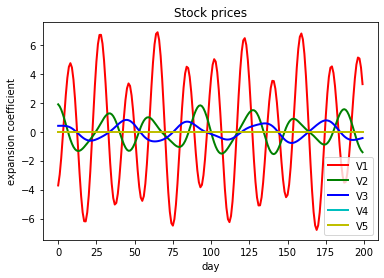

In [63]:
# Plot the data
Np = 200
tp = np.arange(0,Np).reshape(1,Np)

fig1=plt.figure(1); plt.clf();
hl1,=plt.plot(tp.T,V[0,tp].T,'r-',linewidth=2);
hl2,=plt.plot(tp.T,V[1,tp].T,'g-',linewidth=2);
hl3,=plt.plot(tp.T,V[2,tp].T,'b-',linewidth=2);
hl4,=plt.plot(tp.T,V[3,tp].T,'c-',linewidth=2);
hl5,=plt.plot(tp.T,V[4,tp].T,'y-',linewidth=2);
plt.legend([hl1,hl2,hl3,hl4,hl5],['V1','V2','V3','V4','V5']);
plt.xlabel('day'); plt.ylabel('expansion coefficient'); plt.title('Stock prices');

### 2e
Looking at the plot above, we can see that only the first three expansion coefficients vary significantly over time, while the other two are basically flat. This would seem to indicate that the first three principla components capture almost all of the variance in the data. Checking below...

In [71]:
eigvals[0:3].sum()/eigvals.sum()

1.0

So we see that indeed, the first three principal comenents are basically all of the variance in the data up to computational percision. Let's reconstruct the data using only these first three PC's and show that the reconstructed data is basically the same as the original.

In [85]:
# Reconstruct data using only the first 3 PCs
F_rec = np.matmul(U[:,0:3],V[0:3,:])

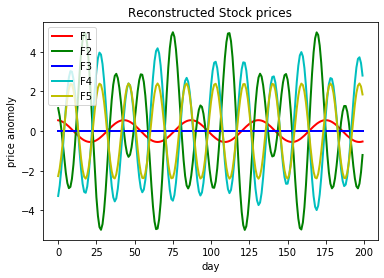

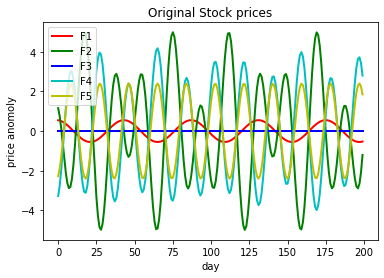

In [88]:
# Plot the data
Np = 200
tp = np.arange(0,Np).reshape(1,Np)

fig1=plt.figure(1); plt.clf();
hl1,=plt.plot(tp.T,F_rec[0,tp].T,'r-',linewidth=2);
hl2,=plt.plot(tp.T,F_rec[1,tp].T,'g-',linewidth=2);
hl3,=plt.plot(tp.T,F_rec[2,tp].T,'b-',linewidth=2);
hl4,=plt.plot(tp.T,F_rec[3,tp].T,'c-',linewidth=2);
hl5,=plt.plot(tp.T,F_rec[4,tp].T,'y-',linewidth=2);
plt.legend([hl1,hl2,hl3,hl4,hl5],['F1','F2','F3','F4','F5']);
plt.xlabel('day'); plt.ylabel('price anomoly'); plt.title('Reconstructed Stock prices');
plt.show()

fig1=plt.figure(1); plt.clf();
hl1,=plt.plot(tp.T,F[0,tp].T,'r-',linewidth=2);
hl2,=plt.plot(tp.T,F[1,tp].T,'g-',linewidth=2);
hl3,=plt.plot(tp.T,F[2,tp].T,'b-',linewidth=2);
hl4,=plt.plot(tp.T,F[3,tp].T,'c-',linewidth=2);
hl5,=plt.plot(tp.T,F[4,tp].T,'y-',linewidth=2);
plt.legend([hl1,hl2,hl3,hl4,hl5],['F1','F2','F3','F4','F5']);
plt.xlabel('day'); plt.ylabel('price anomoly'); plt.title('Original Stock prices');
plt.show()

Notice how the data reconstructed from the first 3 PC's is almost exactly the same as the original stock prices. It makes sense that the first three PC's reconstruct the data almost perfectly since the data was construced as a linear combination of three vectors at each point. Therefore, we should expect the data to be near perfectly reconstructable from three PC's.

### 3a

In [145]:
import numpy as np

In [146]:
A = np.array([[-10,1,7],[1,-1,2]])
print(A)

[[-10   1   7]
 [  1  -1   2]]


In [147]:
AA_T = np.matmul(A, A.T)
print(AA_T)

[[150   3]
 [  3   6]]


In [148]:
eigvals, eigvecs = np.linalg.eig(AA_T)
print("Eigenvalues of AA_T:")
print(eigvals)
print("Eigenvectors of AA_T:")
print(eigvecs)

Eigenvalues of AA_T:
[150.06247   5.93753]
Eigenvectors of AA_T:
[[ 0.99978 -0.02082]
 [ 0.02082  0.99978]]


In [149]:
np.sqrt(eigvals)

array([12.25  ,  2.4367])

In [150]:
U = eigvecs
Sigma = np.hstack((np.diag(np.sqrt(eigvals)),np.array([[0],[0]])))
print("U:")
print(U)
print("Sigma")
print(Sigma)

U:
[[ 0.99978 -0.02082]
 [ 0.02082  0.99978]]
Sigma
[[12.25    0.      0.    ]
 [ 0.      2.4367  0.    ]]


In [151]:
v1 = np.matmul(A.T, eigvecs[:,0])/np.sqrt(eigvals[0])
v2 = np.matmul(A.T, eigvecs[:,1])/np.sqrt(eigvals[1])
print("v1:")
print(v1)
print("v2:")
print(v2)

v1:
[-0.81445  0.07992  0.5747 ]
v2:
[ 0.49574 -0.41885  0.76079]


In [159]:
v3 = np.array([1,1,1])
v3 = v3 - (np.dot(v3,v1)/np.dot(v1,v1))*v1-(np.dot(v3,v2)/np.dot(v2,v2))*v2
print(v3)

[0.45455 1.36364 0.45455]


In [160]:
V = np.hstack((v1.reshape(3,1), v2.reshape(3,1), v3.reshape(3,1)))
print(V)

[[-0.81445  0.49574  0.45455]
 [ 0.07992 -0.41885  1.36364]
 [ 0.5747   0.76079  0.45455]]


### 3b

In [162]:
# Test and see if my SVD is correct
A_rec = U@Sigma@V.T
print("A reconstructed from SVD:")
print(A_rec)
print("Original A:")
print(A)

A reconstructed from SVD:
[[-10.   1.   7.]
 [  1.  -1.   2.]]
Original A:
[[-10   1   7]
 [  1  -1   2]]


In [167]:
# Now look at pythons SVD
u, s, vh = np.linalg.svd(A)
print("Python's U:")
print(u)
print("Python's Sigma")
print(s)
print("Python's V:")
print(vh.T)

Python's U:
[[-0.99978 -0.02082]
 [-0.02082  0.99978]]
Python's Sigma
[12.25    2.4367]
Python's V:
[[ 0.81445  0.49574  0.30151]
 [-0.07992 -0.41885  0.90453]
 [-0.5747   0.76079  0.30151]]


The absolute value of all of the numbers obtained by python's SVD are the same as mine execept for the third column of V. This discrepency is explained by the fact that this column was found by doing Grahm-Shmidt orthogonalization on a randomly initialized vector. This means that the vector could end up being different by a scalar multiple, depending on the random initialization. In addition, there are some differences in the signs of some of the columns in V and U. This is because, as mentioned earlier, eigenvectors are only uniquely defined up to a minus sign.